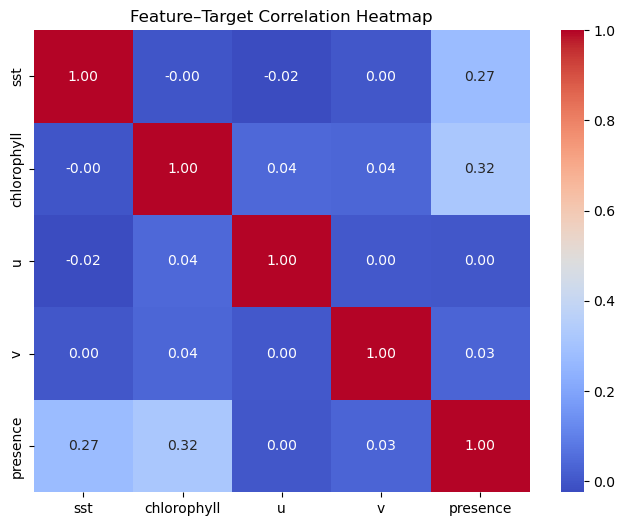

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your processed dataset
grid = pd.read_csv("/Users/karanbadlani/Desktop/whale-hotspots/data_s2.csv")

# Correlation matrix
plt.figure(figsize=(8,6))
corr = grid[['sst','chlorophyll','u','v','presence']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature–Target Correlation Heatmap")
plt.show()


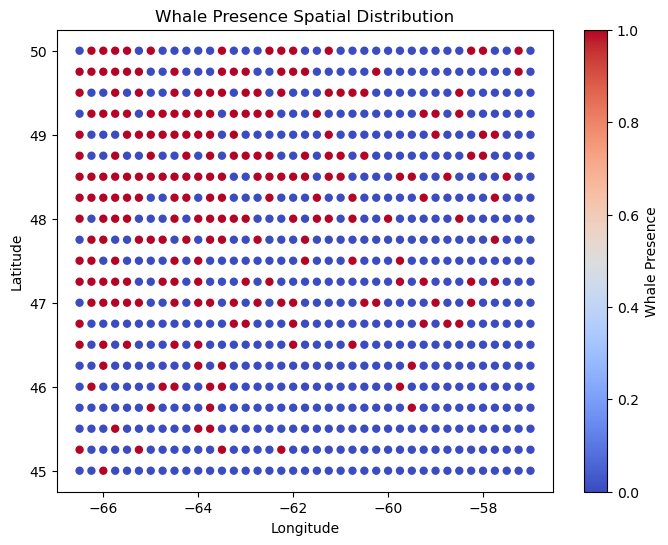

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(grid['lon'], grid['lat'], c=grid['presence'], cmap='coolwarm', s=25)
plt.colorbar(label='Whale Presence')
plt.title("Whale Presence Spatial Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

/var/folders/l2/p3fp1v2n08d1ygy1cmby6ycm0000gn/T/ipykernel_11922/1939389285.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(grid[col][grid['presence']==0], label=f"{col} (no whale)", shade=True)
/var/folders/l2/p3fp1v2n08d1ygy1cmby6ycm0000gn/T/ipykernel_11922/1939389285.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(grid[col][grid['presence']==1], label=f"{col} (whale)", shade=True)


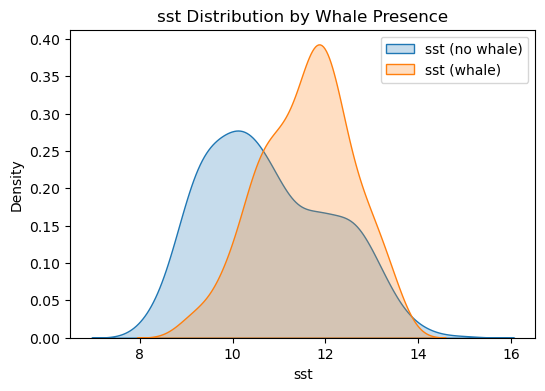

/var/folders/l2/p3fp1v2n08d1ygy1cmby6ycm0000gn/T/ipykernel_11922/1939389285.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(grid[col][grid['presence']==0], label=f"{col} (no whale)", shade=True)
/var/folders/l2/p3fp1v2n08d1ygy1cmby6ycm0000gn/T/ipykernel_11922/1939389285.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(grid[col][grid['presence']==1], label=f"{col} (whale)", shade=True)


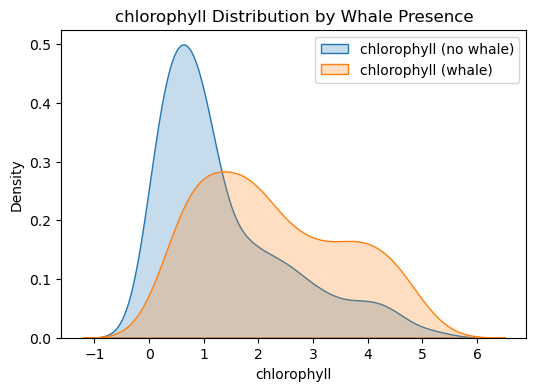

/var/folders/l2/p3fp1v2n08d1ygy1cmby6ycm0000gn/T/ipykernel_11922/1939389285.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(grid[col][grid['presence']==0], label=f"{col} (no whale)", shade=True)
/var/folders/l2/p3fp1v2n08d1ygy1cmby6ycm0000gn/T/ipykernel_11922/1939389285.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(grid[col][grid['presence']==1], label=f"{col} (whale)", shade=True)


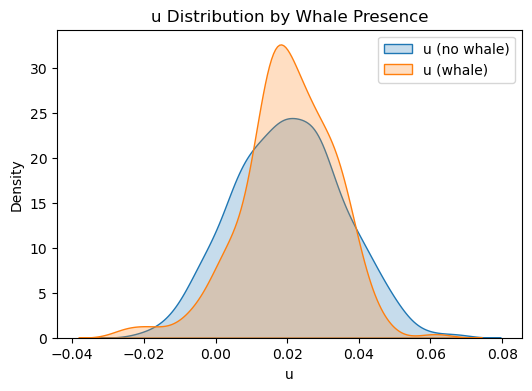

/var/folders/l2/p3fp1v2n08d1ygy1cmby6ycm0000gn/T/ipykernel_11922/1939389285.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(grid[col][grid['presence']==0], label=f"{col} (no whale)", shade=True)
/var/folders/l2/p3fp1v2n08d1ygy1cmby6ycm0000gn/T/ipykernel_11922/1939389285.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(grid[col][grid['presence']==1], label=f"{col} (whale)", shade=True)


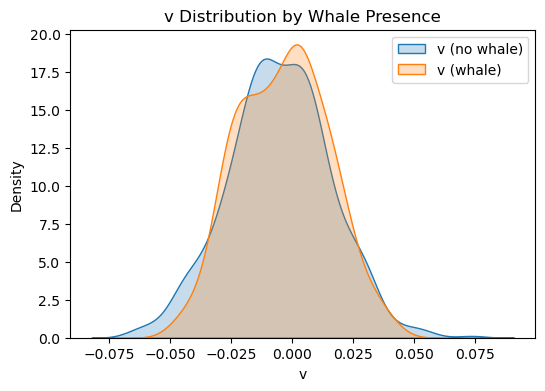

In [7]:
for col in ['sst','chlorophyll','u','v']:
    plt.figure(figsize=(6,4))
    sns.kdeplot(grid[col][grid['presence']==0], label=f"{col} (no whale)", shade=True)
    sns.kdeplot(grid[col][grid['presence']==1], label=f"{col} (whale)", shade=True)
    plt.title(f"{col} Distribution by Whale Presence")
    plt.legend()
    plt.show()

### Whale HotSpot

In [ ]:
# hotspot_map_region.py
# pip install pandas matplotlib cartopy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

df = pd.read_csv("data_engineered.csv")
required_cols = {"lat", "lon", "presence"}
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns: {missing}")

# Finding a predicted-probability column
prob_col = None
for c in df.columns:
    if c.lower() in ["presence_prob", "pred_prob", "y_prob", "p^"]:
        prob_col = c
        break
if prob_col is None:
    raise ValueError("No prediction column found. Add one named 'presence_prob' (or 'pred_prob', 'y_prob', 'p^').")

df["presence"] = df["presence"].astype(int)


# Defining  study region (Gulf of St. Lawrence)

LON_MIN, LON_MAX = -70, -55
LAT_MIN, LAT_MAX =  41,  50

roi = df[(df["lon"] >= LON_MIN) & (df["lon"] <= LON_MAX) &
         (df["lat"] >= LAT_MIN) & (df["lat"] <= LAT_MAX)].copy()

if roi.empty:
    # Fallback: auto-bounds from data (with a small pad)
    pad = 1.0
    LON_MIN, LON_MAX = df["lon"].min()-pad, df["lon"].max()+pad
    LAT_MIN, LAT_MAX = df["lat"].min()-pad, df["lat"].max()+pad
    roi = df.copy()

# Top-10% threshold for hotspots
thresh = roi[prob_col].quantile(0.90)
roi_top = roi[roi[prob_col] >= thresh]


#  Actual vs Predicted map
fig = plt.figure(figsize=(14, 5))

# Actual sightings
ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax1.set_extent([LON_MIN, LON_MAX, LAT_MIN, LAT_MAX], crs=ccrs.PlateCarree())
ax1.coastlines(resolution='50m', linewidth=0.8)
ax1.add_feature(cfeature.LAND, facecolor="#f0f0f0")
ax1.add_feature(cfeature.OCEAN, facecolor="#dbeef7")
ax1.add_feature(cfeature.BORDERS, linestyle=":", alpha=0.5)
ax1.gridlines(draw_labels=True, linewidth=0.3, alpha=0.5)

# Actual presence points
actual = roi[roi["presence"] == 1]
ax1.scatter(actual["lon"], actual["lat"], s=18,
            color="crimson", edgecolor="k", linewidth=0.3,
            transform=ccrs.PlateCarree(), label="Actual sightings (WhaleMap)")

ax1.set_title("Actual Whale Sightings", fontsize=12)
ax1.legend(loc="lower left")

# Predicted probabilities
ax2 = plt.subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax2.set_extent([LON_MIN, LON_MAX, LAT_MIN, LAT_MAX], crs=ccrs.PlateCarree())
ax2.coastlines(resolution='50m', linewidth=0.8)
ax2.add_feature(cfeature.LAND, facecolor="#f0f0f0")
ax2.add_feature(cfeature.OCEAN, facecolor="#dbeef7")
ax2.add_feature(cfeature.BORDERS, linestyle=":", alpha=0.5)
ax2.gridlines(draw_labels=True, linewidth=0.3, alpha=0.5)

# Colored by predicted probability
sc = ax2.scatter(roi["lon"], roi["lat"], c=roi[prob_col], s=18,
                 cmap="plasma", alpha=0.8, transform=ccrs.PlateCarree(),
                 edgecolor="none")

# Highlight top-10% hotspots
ax2.scatter(roi_top["lon"], roi_top["lat"], s=10,
            facecolor="none", edgecolor="red", linewidth=0.7,
            transform=ccrs.PlateCarree(), label="Top 10% hotspots")

cb = plt.colorbar(sc, ax=ax2, orientation="vertical", shrink=0.8)
cb.set_label("Predicted presence probability")

ax2.set_title("Predicted Hotspots (Model Probability + Top 10%)", fontsize=12)
ax2.legend(loc="lower left")

plt.suptitle("WhaleMap Hotspot — Study Region (Phase I)", fontsize=13, y=1.02)
plt.tight_layout()
plt.savefig("hotspot_actual_vs_pred.png", dpi=300, bbox_inches="tight")
plt.show()


fig = plt.figure(figsize=(11,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution='110m', linewidth=0.7)
ax.add_feature(cfeature.LAND, facecolor="#f0f0f0")
ax.add_feature(cfeature.OCEAN, facecolor="#dbeef7")
ax.add_feature(cfeature.BORDERS, linestyle=":", alpha=0.5)

sc = ax.scatter(df["lon"], df["lat"], c=df[prob_col], s=12, alpha=0.7,
                cmap="plasma", transform=ccrs.PlateCarree(), edgecolor="none")
plt.colorbar(sc, label="Predicted presence probability", shrink=0.7)
ax.set_title("Global Whale Hotspot Probability Map (Phase I)", fontsize=12)
plt.tight_layout()
plt.savefig("hotspot_pred_worldmap.png", dpi=300, bbox_inches="tight")
plt.show()

print("Saved: hotspot_actual_vs_pred.png and hotspot_pred_worldmap.png")